In [1]:
# It has a sequence of measurements taken at successive equally spaced points in time. 
# it is a sequence of discrete time data
# it could be of anytime period minutes, secods, micro seconds, nan secs...days, weeks, months. 

In [2]:
# Data is from a European countries
# The European countries use comma(,) in place of the decimal point. 
# CSV files from europe have ; as a seperator
# missing values are tagged as -200
# last 114 rows and the last 2 columns are empty and need to be pruned

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  datetime

In [4]:
air = pd.read_csv('AirQualityUCI.csv', sep = ';', decimal = ',', parse_dates =[[0,1]], na_values = -200)

air = air.iloc[:-114,:-2]
air

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005 10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005 11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005 12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005 13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [5]:
air.Date_Time

0       10/03/2004 18.00.00
1       10/03/2004 19.00.00
2       10/03/2004 20.00.00
3       10/03/2004 21.00.00
4       10/03/2004 22.00.00
               ...         
9352    04/04/2005 10.00.00
9353    04/04/2005 11.00.00
9354    04/04/2005 12.00.00
9355    04/04/2005 13.00.00
9356    04/04/2005 14.00.00
Name: Date_Time, Length: 9357, dtype: object

In [6]:
air.Date_Time = pd.to_datetime(air.Date_Time, format = '%d/%m/%Y %H.%M.%S')

In [7]:
air

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04 11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04 12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04 13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
air.Date_Time

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: Date_Time, Length: 9357, dtype: datetime64[ns]

In [9]:
# pre requisite for datetime data is for the datetime columns to be set as index and should be sorted. 

In [10]:
air.set_index('Date_Time', inplace = True)

In [11]:
air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
air.index.is_monotonic_increasing

True

In [13]:
air.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [14]:
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


<AxesSubplot:>

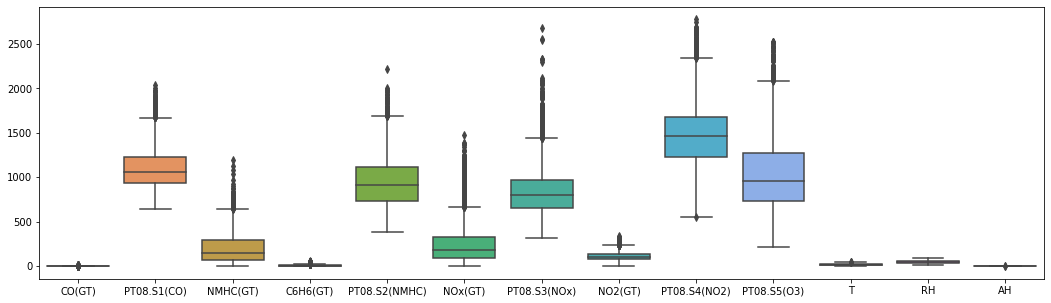

In [20]:
f = plt.figure(figsize=(18,5))
sns.boxplot(data=air)

<AxesSubplot:xlabel='Date_Time'>

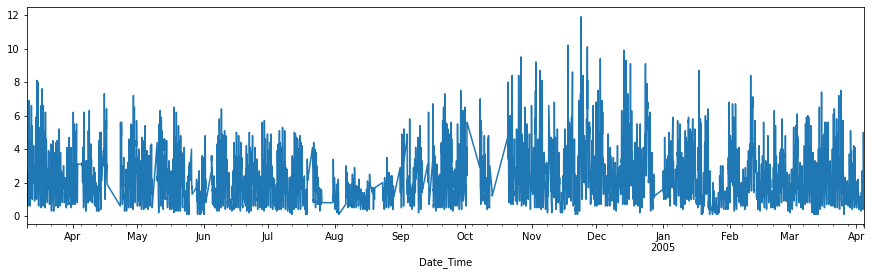

In [24]:
# Time Characteristics
air['CO(GT)'].interpolate().plot(figsize=(15,4))
# trend

In [25]:
# trend analysis for daily, weekly, monthly and yearly

<AxesSubplot:title={'center':'Monday 2004-03-15'}, xlabel='Date_Time'>

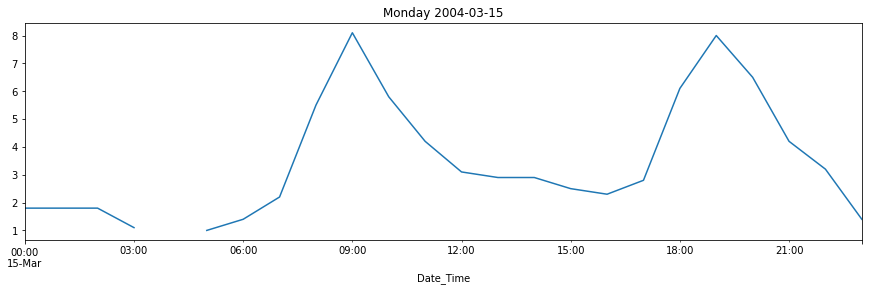

In [28]:
# daily trend
param, period = 'CO(GT)', '2004-03-15'
f = plt.figure(figsize=(15,4))
air.loc[period][param].plot(title = datetime.strptime(period, '%Y-%m-%d').strftime('%A')+' '+period)

In [29]:
air.loc[period][param]

Date_Time
2004-03-15 00:00:00    1.8
2004-03-15 01:00:00    1.8
2004-03-15 02:00:00    1.8
2004-03-15 03:00:00    1.1
2004-03-15 04:00:00    NaN
2004-03-15 05:00:00    1.0
2004-03-15 06:00:00    1.4
2004-03-15 07:00:00    2.2
2004-03-15 08:00:00    5.5
2004-03-15 09:00:00    8.1
2004-03-15 10:00:00    5.8
2004-03-15 11:00:00    4.2
2004-03-15 12:00:00    3.1
2004-03-15 13:00:00    2.9
2004-03-15 14:00:00    2.9
2004-03-15 15:00:00    2.5
2004-03-15 16:00:00    2.3
2004-03-15 17:00:00    2.8
2004-03-15 18:00:00    6.1
2004-03-15 19:00:00    8.0
2004-03-15 20:00:00    6.5
2004-03-15 21:00:00    4.2
2004-03-15 22:00:00    3.2
2004-03-15 23:00:00    1.4
Name: CO(GT), dtype: float64

In [32]:
# resample
# Downsample
air.loc[period][param].resample('2H').mean()

Date_Time
2004-03-15 00:00:00    1.80
2004-03-15 02:00:00    1.45
2004-03-15 04:00:00    1.00
2004-03-15 06:00:00    1.80
2004-03-15 08:00:00    6.80
2004-03-15 10:00:00    5.00
2004-03-15 12:00:00    3.00
2004-03-15 14:00:00    2.70
2004-03-15 16:00:00    2.55
2004-03-15 18:00:00    7.05
2004-03-15 20:00:00    5.35
2004-03-15 22:00:00    2.30
Freq: 2H, Name: CO(GT), dtype: float64

<AxesSubplot:title={'center':'Monday 2004-03-15'}, xlabel='Date_Time'>

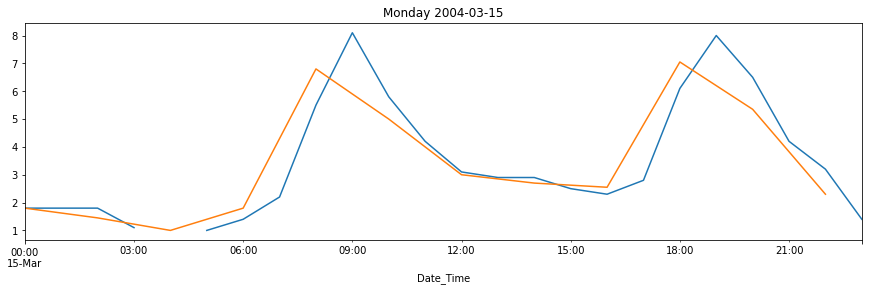

In [33]:
param, period = 'CO(GT)', '2004-03-15'
f = plt.figure(figsize=(15,4))
air.loc[period][param].plot(title = datetime.strptime(period, '%Y-%m-%d').strftime('%A')+' '+period)
air.loc[period][param].resample('2H').mean().plot()

<AxesSubplot:title={'center':'week of 2004-03-15'}, xlabel='Date_Time'>

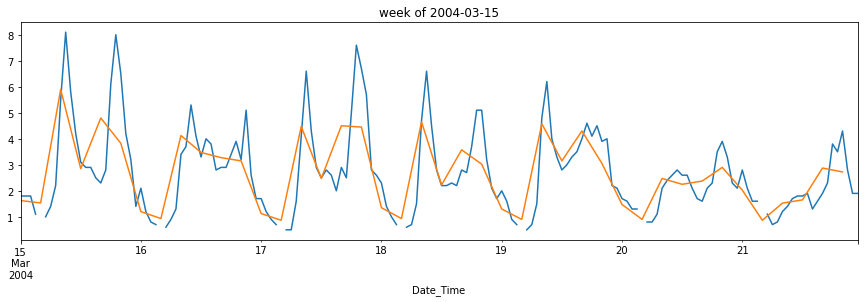

In [36]:
# weekly trendair
param, period = 'CO(GT)', slice('2004-03-15', '2004-03-21')
f = plt.figure(figsize=(15,4))
selected = air.loc[period][param]
selected.plot(title=f'week of {period.start}');
selected.resample('4H').mean().plot()

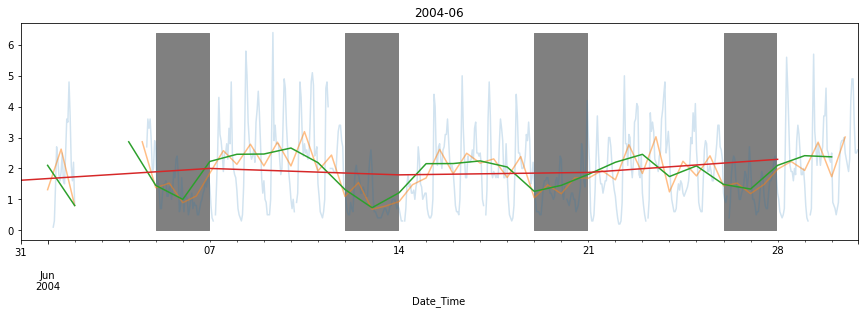

In [47]:
# monthly trend
param, period = 'CO(GT)', '2004-06'
f = plt.figure(figsize=(15,4))
selected = air.loc[period][param]
selected.plot(title=period, alpha=0.2);
selected.resample('12H').mean().plot(alpha=0.5)
selected.resample('1D').mean().plot()
selected.resample('1W').mean().plot()
plt.fill_between(air.index, selected.max(), where=air.index.day_of_week >=5, color='grey')

In [40]:
# Rolling/Moving/Running average
# technique that smooths out short term fluctuations, highlights longer term trends is called a rolling/moving/running average.
# categories :  lagging indicator as it actually lags behind actual metric being smoothed, lag depends on window size. 

In [44]:
param, period = 'CO(GT)', '2004-03-12'
air.loc[period][param]

Date_Time
2004-03-12 00:00:00    1.7
2004-03-12 01:00:00    1.9
2004-03-12 02:00:00    1.4
2004-03-12 03:00:00    0.8
2004-03-12 04:00:00    NaN
2004-03-12 05:00:00    0.6
2004-03-12 06:00:00    0.8
2004-03-12 07:00:00    1.4
2004-03-12 08:00:00    4.4
2004-03-12 09:00:00    NaN
2004-03-12 10:00:00    3.1
2004-03-12 11:00:00    2.7
2004-03-12 12:00:00    2.1
2004-03-12 13:00:00    2.5
2004-03-12 14:00:00    2.7
2004-03-12 15:00:00    2.9
2004-03-12 16:00:00    2.8
2004-03-12 17:00:00    2.4
2004-03-12 18:00:00    3.9
2004-03-12 19:00:00    3.7
2004-03-12 20:00:00    6.6
2004-03-12 21:00:00    4.4
2004-03-12 22:00:00    3.5
2004-03-12 23:00:00    5.4
Name: CO(GT), dtype: float64

In [46]:
air.loc[period][param].interpolate().rolling(2, min_periods=1).mean()
# interpolate and min_period helps remove NaN

Date_Time
2004-03-12 00:00:00    1.700
2004-03-12 01:00:00    1.800
2004-03-12 02:00:00    1.650
2004-03-12 03:00:00    1.100
2004-03-12 04:00:00    0.750
2004-03-12 05:00:00    0.650
2004-03-12 06:00:00    0.700
2004-03-12 07:00:00    1.100
2004-03-12 08:00:00    2.900
2004-03-12 09:00:00    4.075
2004-03-12 10:00:00    3.425
2004-03-12 11:00:00    2.900
2004-03-12 12:00:00    2.400
2004-03-12 13:00:00    2.300
2004-03-12 14:00:00    2.600
2004-03-12 15:00:00    2.800
2004-03-12 16:00:00    2.850
2004-03-12 17:00:00    2.600
2004-03-12 18:00:00    3.150
2004-03-12 19:00:00    3.800
2004-03-12 20:00:00    5.150
2004-03-12 21:00:00    5.500
2004-03-12 22:00:00    3.950
2004-03-12 23:00:00    4.450
Name: CO(GT), dtype: float64

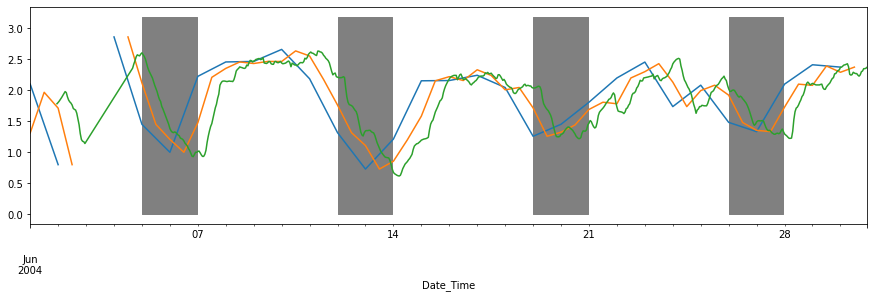

In [50]:
# monthly trend
param, period = 'CO(GT)', '2004-06'
f = plt.figure(figsize=(15,4))
selected = air.loc[period][param]
#selected.plot(title=period, alpha=0.2);
half_day  = selected.resample('12H').mean()
selected.resample('1D').mean().plot(title = period, alpha=1)
half_day.rolling(2, min_periods = 1).mean().plot()
#selected.rolling(24, min_periods =1).mean().plot()
selected.interpolate().rolling(24).mean().plot()
#selected.resample('1W').mean().plot()
plt.fill_between(air.index, half_day.max(), where=air.index.day_of_week >=5, color='grey')

In [51]:
def plot_air(param, period=slice(None)):
    'plot air quality data in 3 granularities: 1 day resamples, 7d resamples, 7 day rolling avg '
    data = {}
    f = plt.figure(figsize=(15,4))
    selected = air.loc[period][param]
    data['1d']  = selected.resample('1d').mean().interpolate()
    data['7d_rolling']  = data['1d'].rolling(7, min_periods=1).mean()
    data['7d'] = selected.resample('1w').mean()
    [d.plot(alpha=1/len(data)*(i+1)) for i, d in enumerate(data.values())]
    plt.legend(data)
    plt.fill_between(air.index, half_day.max(), where=air.index.day_of_week >=5, color='grey')

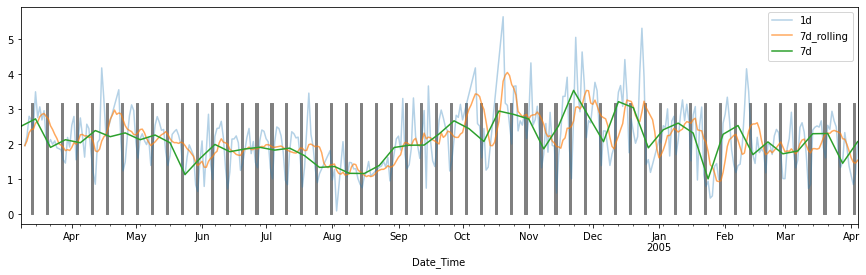

In [52]:
plot_air('CO(GT)')

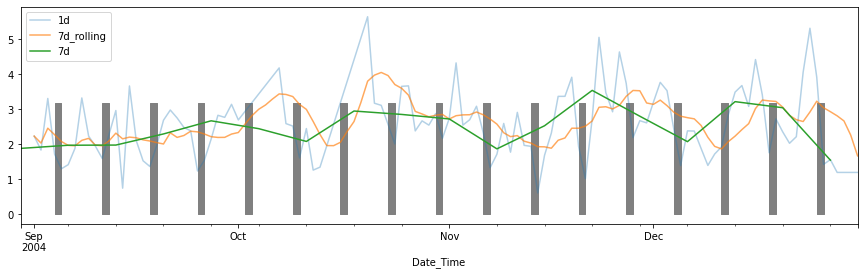

In [53]:
Q4_04 = slice('2004-09', '2004-12')
plot_air('CO(GT)',Q4_04)

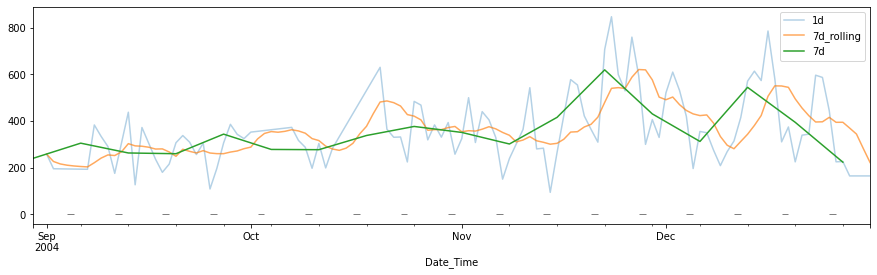

In [54]:
plot_air('NOx(GT)',Q4_04)

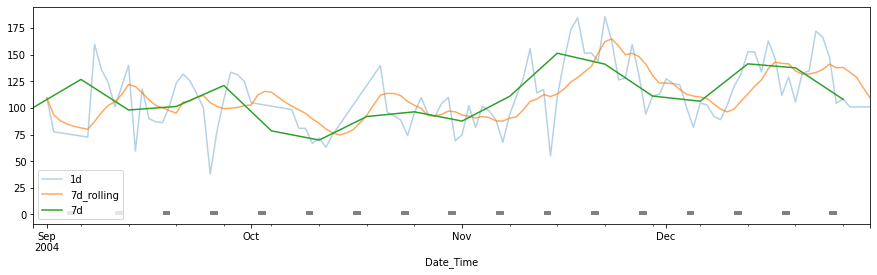

In [55]:
plot_air('NO2(GT)',Q4_04)